In [475]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from persiantools.jdatetime import JalaliDate
import matplotlib.pyplot as plt
import finpy_tse as fpy
import finpy_tse as tse
import matplotlib.pyplot as plt
import glob
import statistics
import random

In [476]:
DF=pd.read_excel('data.xlsx') 

In [477]:
df=DF.set_index(DF['دوره مالی'])
df=df.drop(columns='دوره مالی')
df=df.drop(columns='Unnamed: 1')
df.T

دوره مالی,تاریخ انتشار,دارایی ها,داراییهای ثابت مشهود,داراییهای نامشهود,طلب از شرکت های گروه و وابسته,سرمایه گذاری در اوراق بهادار,سایر حسابها و اسناد دریافتنی,سایر دارایی ها,مطالبات از دولت,تسهیلات اعطایی به سایر اشخاص,...,سایر بدهی‌ها,ذخیره مالیات بر درامد,سود سهام پیشنهادی و پرداختنی,اوراق بدهی,سپرده های مشتریان,بدهی به بانکها و موسسات اعتباری,جمع بدهی های قبل از حقوق صاحبان سپرده های سرمایه گذاری,سپرده های سرمایه گذاری مدت دار,جمع بدهیهای جاری و غیر جاری,جمع بدهیها و حقوق صاحبان سهام
1395,1397-05-29 (8),NaN,62315533,829147,-,36853168,107703699,63854271,281602327,482236279,...,93487322,0,554035,-,187948887,15537910,-,769176731,1158183302,1202595668
1396,1398-04-25 (10),NaN,60406040,983071,-,46418510,81507039,80695177,336787839,546662828,...,112250444,0,365581,-,223007085,27453117,-,885940180,1388019870,1345745625
1397,1399-05-15 (8),NaN,146805063,9641631,-,130287252,101951751,111275276,402923136,688013358,...,133109220,0,0,-,389306586,33957382,-,1039572033,1783903912,1918279845
1398,1400-04-23 (9),NaN,135596141,9649514,29974623,123808559,160071527,88856860,464515556,878270498,...,224950325,30578501,0,0,690120132,115254822,1081135135,1292527960,2373663095,2482112323
1399,1400-10-29 (7),NaN,144729947,9793599,57809878,511562263,219637243,108425617,477370991,1530397632,...,330181900,65203303,362818,0,1125884052,79919832,-,1982133432,3632548983,3894476476


In [478]:
a=df.T
a=a.replace('-',0)
a

دوره مالی,تاریخ انتشار,دارایی ها,داراییهای ثابت مشهود,داراییهای نامشهود,طلب از شرکت های گروه و وابسته,سرمایه گذاری در اوراق بهادار,سایر حسابها و اسناد دریافتنی,سایر دارایی ها,مطالبات از دولت,تسهیلات اعطایی به سایر اشخاص,...,سایر بدهی‌ها,ذخیره مالیات بر درامد,سود سهام پیشنهادی و پرداختنی,اوراق بدهی,سپرده های مشتریان,بدهی به بانکها و موسسات اعتباری,جمع بدهی های قبل از حقوق صاحبان سپرده های سرمایه گذاری,سپرده های سرمایه گذاری مدت دار,جمع بدهیهای جاری و غیر جاری,جمع بدهیها و حقوق صاحبان سهام
1395,1397-05-29 (8),NaN,62315533,829147,0,36853168,107703699,63854271,281602327,482236279,...,93487322,0,554035,0,187948887,15537910,0,769176731,1158183302,1202595668
1396,1398-04-25 (10),NaN,60406040,983071,0,46418510,81507039,80695177,336787839,546662828,...,112250444,0,365581,0,223007085,27453117,0,885940180,1388019870,1345745625
1397,1399-05-15 (8),NaN,146805063,9641631,0,130287252,101951751,111275276,402923136,688013358,...,133109220,0,0,0,389306586,33957382,0,1039572033,1783903912,1918279845
1398,1400-04-23 (9),NaN,135596141,9649514,29974623,123808559,160071527,88856860,464515556,878270498,...,224950325,30578501,0,0,690120132,115254822,1081135135,1292527960,2373663095,2482112323
1399,1400-10-29 (7),NaN,144729947,9793599,57809878,511562263,219637243,108425617,477370991,1530397632,...,330181900,65203303,362818,0,1125884052,79919832,0,1982133432,3632548983,3894476476


In [479]:
a['سود سهام پیشنهادی و پرداختنی']

1395    554035
1396    365581
1397         0
1398         0
1399    362818
Name: سود سهام پیشنهادی و پرداختنی, dtype: int64

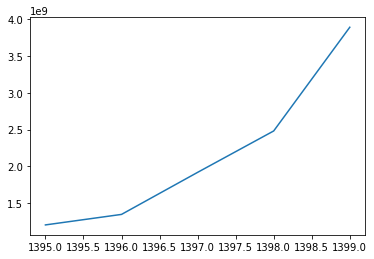

In [480]:
a['جمع داراییها'].plot()

In [481]:
onwan=DF['دوره مالی']
asset=[]
for i in range(2,14):
    asset.append(onwan[i])

In [482]:
debt=[]
for i in range(28,37):
    debt.append(onwan[i])

In [483]:
saheban=[]
for i in range(16,26):
    saheban.append(onwan[i])

In [484]:
ass=pd.DataFrame(asset)


In [485]:
illi=[]
for i in range(0,5):
    illi.append(asset[i])


In [486]:
liq=[]
for i in range(6,12):
    liq.append(asset[i])


In [487]:
liq

['مطالبات از دولت',
 'تسهیلات اعطایی به سایر اشخاص',
 'تسهیلات اعطایی و مطالبات از اشخاص دولتی',
 'مطالبات از سایر بانکها و موسسات اعتباری',
 'سپرده قانونی',
 'موجودی نقد']

In [488]:
debt
deb=pd.DataFrame(debt)
deb

,0
0,ذخیره مزایای پایان خدمت
1,سایر بدهی‌ها
2,ذخیره مالیات بر درامد
3,سود سهام پیشنهادی و پرداختنی
4,اوراق بدهی
5,سپرده های مشتریان
6,بدهی به بانکها و موسسات اعتباری
7,جمع بدهی های قبل از حقوق صاحبان سپرده های سرما...
8,سپرده های سرمایه گذاری مدت دار


In [489]:
illi_deb=[] #بدهی نقدنشونده
for i in range(0,3):
    illi_deb.append(debt[i])

In [490]:
liq_deb=[] #بدهی های نقد شونده
for i in range(3,9):
    liq_deb.append(debt[i])
liq_deb

['سود سهام پیشنهادی و پرداختنی',
 'اوراق بدهی',
 'سپرده های مشتریان',
 'بدهی به بانکها و موسسات اعتباری',
 'جمع بدهی های قبل از حقوق صاحبان سپرده های سرمایه گذاری',
 'سپرده های سرمایه گذاری مدت دار']

In [491]:
jj=a
jj['sal']=['1395','1396','1397','1398','1399']
jj.set_index(jj['sal'])

دوره مالی,تاریخ انتشار,دارایی ها,داراییهای ثابت مشهود,داراییهای نامشهود,طلب از شرکت های گروه و وابسته,سرمایه گذاری در اوراق بهادار,سایر حسابها و اسناد دریافتنی,سایر دارایی ها,مطالبات از دولت,تسهیلات اعطایی به سایر اشخاص,...,ذخیره مالیات بر درامد,سود سهام پیشنهادی و پرداختنی,اوراق بدهی,سپرده های مشتریان,بدهی به بانکها و موسسات اعتباری,جمع بدهی های قبل از حقوق صاحبان سپرده های سرمایه گذاری,سپرده های سرمایه گذاری مدت دار,جمع بدهیهای جاری و غیر جاری,جمع بدهیها و حقوق صاحبان سهام,sal
sal,,,,,,,,,,,,,,,,,,,,,
1395,1397-05-29 (8),NaN,62315533,829147,0,36853168,107703699,63854271,281602327,482236279,...,0,554035,0,187948887,15537910,0,769176731,1158183302,1202595668,1395
1396,1398-04-25 (10),NaN,60406040,983071,0,46418510,81507039,80695177,336787839,546662828,...,0,365581,0,223007085,27453117,0,885940180,1388019870,1345745625,1396
1397,1399-05-15 (8),NaN,146805063,9641631,0,130287252,101951751,111275276,402923136,688013358,...,0,0,0,389306586,33957382,0,1039572033,1783903912,1918279845,1397
1398,1400-04-23 (9),NaN,135596141,9649514,29974623,123808559,160071527,88856860,464515556,878270498,...,30578501,0,0,690120132,115254822,1081135135,1292527960,2373663095,2482112323,1398
1399,1400-10-29 (7),NaN,144729947,9793599,57809878,511562263,219637243,108425617,477370991,1530397632,...,65203303,362818,0,1125884052,79919832,0,1982133432,3632548983,3894476476,1399


In [492]:
liq_Deb = pd.DataFrame()
for i in liq_deb:
    liq_Deb[i]=a[i]
    

In [493]:
liq_Deb = pd.DataFrame()
for i in liq_deb:
    liq_Deb[i]=a[i]
liq_Deb=liq_Deb.replace('-',0)
liq_Deb=liq_Deb.T

In [494]:
sld=liq_Deb.iloc[:,q].sum()
sld

3188300134

In [495]:
illi_Deb = pd.DataFrame()
for i in illi_deb:
    illi_Deb[i]=a[i]
illi_Deb=illi_Deb.T
illi_Deb

,1395,1396,1397,1398,1399
ذخیره مزایای پایان خدمت,15651547,17522009,19243466,20231355,48863646
سایر بدهی‌ها,93487322,112250444,133109220,224950325,330181900
ذخیره مالیات بر درامد,0,0,0,30578501,65203303


In [496]:
sild=illi_Deb.iloc[:,q].sum()
sild

444248849

In [545]:
illi_as = pd.DataFrame()
for i in illi:
    illi_as[i]=a[i]
illi_as=illi_as.T
illi_as.index


,illiquid asset
0,داراییهای ثابت مشهود
1,داراییهای نامشهود
2,طلب از شرکت های گروه و وابسته
3,سرمایه گذاری در اوراق بهادار
4,سایر حسابها و اسناد دریافتنی


In [498]:
sila=illi_as.iloc[:,q].sum()
sila

943532930

In [562]:
li_as = pd.DataFrame()
for i in liq:
    li_as[i]=a[i]
li_as=li_as.T


814235870

In [569]:
lii=[]
liid=[]
for i in range(0,5):
    lii.append(li_as[1395+i].sum())
    liid.append(liq_Deb[1395+i].sum())
liii=pd.DataFrame()
liii['sum_liq_a']=lii
liii['sum_liq_d']=liid
liii


,sum_liq_a,sum_liq_d
0,814235870,973217563
1,945722131,1136765963
2,1249228103,1462836001
3,1934155099,3179038049
4,2842517929,3188300134


In [549]:
f=pd.DataFrame()
g=pd.DataFrame()
f['illiquid asset']=illi_as.index
g['liquid asset']=li_as.index
p=pd.DataFrame()
p['illiquid debt']=illi_Deb.index
r=pd.DataFrame()
r['liquid debt']=liq_Deb.index
r


,liquid debt
0,سود سهام پیشنهادی و پرداختنی
1,اوراق بدهی
2,سپرده های مشتریان
3,بدهی به بانکها و موسسات اعتباری
4,جمع بدهی های قبل از حقوق صاحبان سپرده های سرما...
5,سپرده های سرمایه گذاری مدت دار


In [500]:
sla=li_as.iloc[:,q].sum()
sla

2842517929

In [501]:
bb_cat=-sla-sild+sila+sld
BB=bb_cat*0.5
BB

422533143.0

In [505]:
#a.iloc[1397,'سپرده های مشتریان']
a.iloc[1,2]

60406040

In [506]:
seporde=[]
seporde=a['سپرده های مشتریان']
seporde[1395]


187948887

In [507]:
bb_a=[]
sepordee=[]
for q in range(0,5):
    sld=liq_Deb.iloc[:,q].sum()
    sild=illi_Deb.iloc[:,q].sum()
    sila=illi_as.iloc[:,q].sum()
    sla=li_as.iloc[:,q].sum()
    bb_cat=-sla-sild+sila+sld
    BB=bb_cat*0.5
    bb_a.append(BB)
    sepordee.append(seporde[1395+q])

In [508]:
bb=pd.DataFrame()
bb['CAT_BB']=bb_a
bb['Deposit']=sepordee
bb

,CAT_BB,Deposit
0,128772185.5,187948887
1,125293019.5,223007085
2,224970454.5,389306586
3,714111566.5,690120132
4,422533143.0,1125884052


In [509]:
bb['year']=[1395,1396,1397,1398,1399]

In [510]:
bb['CAT_BB/Total Deposit']=bb['CAT_BB']/bb['Deposit']
bb=bb.set_index(bb['year'])
bb=bb.drop(columns='year')
bb

,CAT_BB,Deposit,CAT_BB/Total Deposit
year,,,
1395,128772185.5,187948887,0.685145
1396,125293019.5,223007085,0.561834
1397,224970454.5,389306586,0.577875
1398,714111566.5,690120132,1.034764
1399,422533143.0,1125884052,0.375290


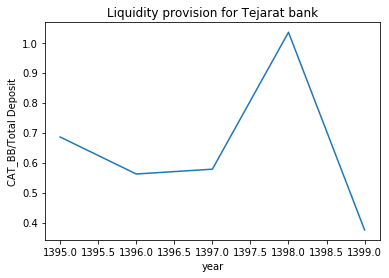

In [511]:
X=bb.index
Z=bb['CAT_BB/Total Deposit']
plt.plot(X,Z)
plt.xlabel('year')
plt.ylabel('CAT_BB/Total Deposit')
plt.title('Liquidity provision for Tejarat bank')
plt.show()


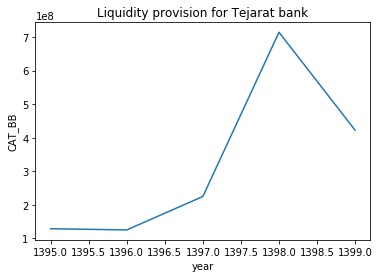

In [512]:
X=bb.index
Y=bb['CAT_BB']
plt.plot(X,Y)
plt.xlabel('year')
plt.ylabel('CAT_BB')
plt.title('Liquidity provision for Tejarat bank')
plt.show()

In [513]:
Milli=[]
for i in range(0,2):
    Milli.append(asset[i]) # در اینجا فرض گرفته شد 2 و 4 نیمه مایع است.
Mliq=[]
Mliq.append(asset[3])
for i in range(8,12):
    Mliq.append(asset[i])
Mliq_deb=[] #بدهی های نقد شونده
for i in range(4,9):
    Mliq_deb.append(debt[i])
Mliq_deb

Milli_deb=[] #بدهی نقدنشونده
for i in range(0,4):
    Milli_deb.append(debt[i])


In [514]:
Mliq_Deb = pd.DataFrame()
for i in Mliq_deb:
    Mliq_Deb[i]=a[i]
Mliq_Deb=Mliq_Deb.replace('-',0)
Mliq_Deb=Mliq_Deb.T

In [515]:
Milli_Deb = pd.DataFrame()
for i in Milli_deb:
    Milli_Deb[i]=a[i]
Milli_Deb=Milli_Deb.T
Milli_Deb

,1395,1396,1397,1398,1399
ذخیره مزایای پایان خدمت,15651547,17522009,19243466,20231355,48863646
سایر بدهی‌ها,93487322,112250444,133109220,224950325,330181900
ذخیره مالیات بر درامد,0,0,0,30578501,65203303
سود سهام پیشنهادی و پرداختنی,554035,365581,0,0,362818


In [516]:
Milli_as = pd.DataFrame()
for i in Milli:
    Milli_as[i]=a[i]
Milli_as=Milli_as.T
Milli_as

,1395,1396,1397,1398,1399
داراییهای ثابت مشهود,62315533,60406040,146805063,135596141,144729947
داراییهای نامشهود,829147,983071,9641631,9649514,9793599


In [517]:
Mli_as = pd.DataFrame()
for i in Mliq:
    Mli_as[i]=a[i]
Mli_as=Mli_as.T
Mli_as

,1395,1396,1397,1398,1399
سرمایه گذاری در اوراق بهادار,36853168,46418510,130287252,123808559,511562263
تسهیلات اعطایی و مطالبات از اشخاص دولتی,940647,795904,267955,1491857,5093810
مطالبات از سایر بانکها و موسسات اعتباری,9952294,8649853,50683264,251313924,407555268
سپرده قانونی,0,0,0,210124467,309337880
موجودی نقد,39504323,52825707,107340390,128438797,112762348


In [518]:
bb_M=[]
for q in range(0,5):
    Msld=Mliq_Deb.iloc[:,q].sum()
    Msild=Milli_Deb.iloc[:,q].sum()
    Msila=Milli_as.iloc[:,q].sum()
    Msla=Mli_as.iloc[:,q].sum()
    bb_MAT=-Msla-Msild+Msila+Msld
    BB_MAT=bb_MAT*0.5
    bb_M.append(BB_MAT)
    #sepordee.append(seporde[1395+q])

In [519]:
bb['MAT_BB']=bb_M
bb

,CAT_BB,Deposit,CAT_BB/Total Deposit,MAT_BB
year,,,,
1395,128772185.5,187948887,0.685145,4.194324e+08
1396,125293019.5,223007085,0.561834,4.794807e+08
1397,224970454.5,389306586,0.577875,5.891756e+08
1398,714111566.5,690120132,1.034764,1.166673e+09
1399,422533143.0,1125884052,0.375290,7.757688e+08


In [520]:
 
ASSET = pd.DataFrame()
for i in asset:
    ASSET[i]=a[i]
ASSET=ASSET.T
ASSET
total_assset=[]
for i in range(0,5):
    total_assset.append(ASSET[1395+i].sum())


In [521]:
DEBT = pd.DataFrame()
for i in debt:
    DEBT[i]=a[i]
DEBT=DEBT.T


total_debt=[]
for i in range(0,5):
    total_debt.append(DEBT[1395+i].sum())

In [522]:
total_debt

[1082356432, 1266538416, 1615188687, 3454798230, 3632548983]

In [523]:
ratio=pd.DataFrame()
ratio['t.asset']=total_assset
ratio['t.debt']=total_debt
ratio['debt/asset']=ratio['t.debt']/ratio['t.asset']
ratio

,t.asset,t.debt,debt/asset
0,1085791688,1082356432,0.996836
1,1215731968,1266538416,1.041791
2,1749189076,1615188687,0.923393
3,2482112323,3454798230,1.391878
4,3894476476,3632548983,0.932744


In [524]:
ratio['year']=[1395,1396,1397,1398,1399]
ratio=ratio.set_index(ratio['year'])
ratio=ratio.drop(columns='year')
ratio

,t.asset,t.debt,debt/asset
year,,,
1395,1085791688,1082356432,0.996836
1396,1215731968,1266538416,1.041791
1397,1749189076,1615188687,0.923393
1398,2482112323,3454798230,1.391878
1399,3894476476,3632548983,0.932744


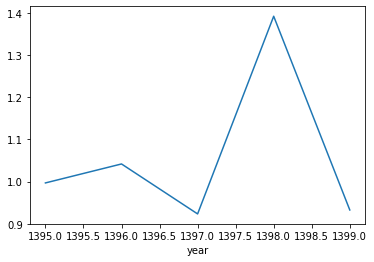

In [525]:
ratio['debt/asset'].plot()

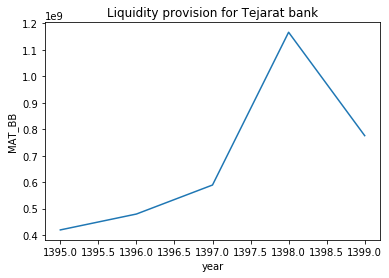

In [526]:
X=bb.index
MAT=bb['MAT_BB']
plt.plot(X,MAT)
plt.xlabel('year')
plt.ylabel('MAT_BB')
plt.title('Liquidity provision for Tejarat bank')
plt.show()

In [527]:
a

دوره مالی,تاریخ انتشار,دارایی ها,داراییهای ثابت مشهود,داراییهای نامشهود,طلب از شرکت های گروه و وابسته,سرمایه گذاری در اوراق بهادار,سایر حسابها و اسناد دریافتنی,سایر دارایی ها,مطالبات از دولت,تسهیلات اعطایی به سایر اشخاص,...,ذخیره مالیات بر درامد,سود سهام پیشنهادی و پرداختنی,اوراق بدهی,سپرده های مشتریان,بدهی به بانکها و موسسات اعتباری,جمع بدهی های قبل از حقوق صاحبان سپرده های سرمایه گذاری,سپرده های سرمایه گذاری مدت دار,جمع بدهیهای جاری و غیر جاری,جمع بدهیها و حقوق صاحبان سهام,sal
1395,1397-05-29 (8),NaN,62315533,829147,0,36853168,107703699,63854271,281602327,482236279,...,0,554035,0,187948887,15537910,0,769176731,1158183302,1202595668,1395
1396,1398-04-25 (10),NaN,60406040,983071,0,46418510,81507039,80695177,336787839,546662828,...,0,365581,0,223007085,27453117,0,885940180,1388019870,1345745625,1396
1397,1399-05-15 (8),NaN,146805063,9641631,0,130287252,101951751,111275276,402923136,688013358,...,0,0,0,389306586,33957382,0,1039572033,1783903912,1918279845,1397
1398,1400-04-23 (9),NaN,135596141,9649514,29974623,123808559,160071527,88856860,464515556,878270498,...,30578501,0,0,690120132,115254822,1081135135,1292527960,2373663095,2482112323,1398
1399,1400-10-29 (7),NaN,144729947,9793599,57809878,511562263,219637243,108425617,477370991,1530397632,...,65203303,362818,0,1125884052,79919832,0,1982133432,3632548983,3894476476,1399


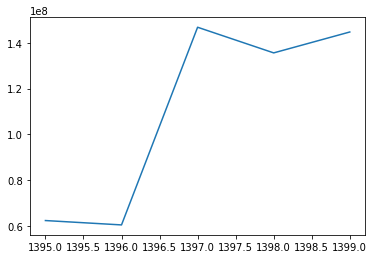

In [553]:
a['داراییهای ثابت مشهود'].plot()


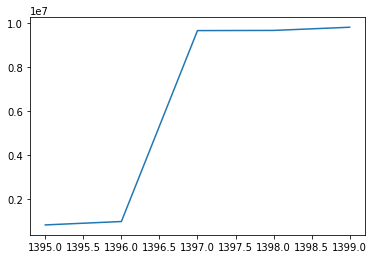

In [556]:
a['داراییهای نامشهود'].plot()


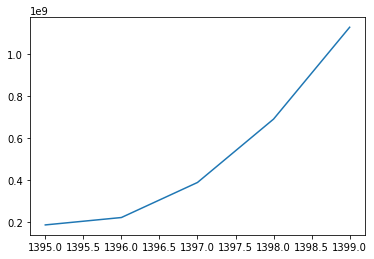

In [557]:
a['سپرده های مشتریان'].plot()

In [530]:
saham = pd.DataFrame()
for i in saheban:
    saham[i]=a[i]
saham=saham.T
saham

,1395,1396,1397,1398,1399
سرمایه,45700000,45700000,223926127,223926127,223926127
وجوه دریافتی بابت افزایش سرمایه,0,0,0,0,0
صرف سهام,0,0,0,0,0
اندوخته صرف سهام,0,0,0,0,0
اندوخته قانونی,7089102,7089102,7089102,7089102,8184143
سایر اندوخته ها,4724044,4724044,4724044,4724044,5454071
مازاد تجدید ارزیابی داراییها,0,0,0,0,0
تفاوت تسعیر ناشی از تبدیل واحد پول گزارشگری,3098687,4204239,8149600,9908890,0
سود (زیان) انباشته,-16199467,-103991630,-109512940,-137198935,5475206
سهام خزانه,0,0,0,0,0


In [531]:
bb['EQUITY']=a['سرمایه']
bb

,CAT_BB,Deposit,CAT_BB/Total Deposit,MAT_BB,EQUITY
year,,,,,
1395,128772185.5,187948887,0.685145,4.194324e+08,45700000
1396,125293019.5,223007085,0.561834,4.794807e+08,45700000
1397,224970454.5,389306586,0.577875,5.891756e+08,223926127
1398,714111566.5,690120132,1.034764,1.166673e+09,223926127
1399,422533143.0,1125884052,0.375290,7.757688e+08,223926127


In [532]:
bb['CAT_BB/EQUITY']=bb['CAT_BB']/bb['EQUITY']
bb

,CAT_BB,Deposit,CAT_BB/Total Deposit,MAT_BB,EQUITY,CAT_BB/EQUITY
year,,,,,,
1395,128772185.5,187948887,0.685145,4.194324e+08,45700000,2.817772
1396,125293019.5,223007085,0.561834,4.794807e+08,45700000,2.741642
1397,224970454.5,389306586,0.577875,5.891756e+08,223926127,1.004664
1398,714111566.5,690120132,1.034764,1.166673e+09,223926127,3.189050
1399,422533143.0,1125884052,0.375290,7.757688e+08,223926127,1.886931


In [533]:
bb['TOTAL ASSET']=ratio['t.asset']
bb['CAT_BB/TOTAL ASSET']=bb['CAT_BB']/bb['TOTAL ASSET']
bb

,CAT_BB,Deposit,CAT_BB/Total Deposit,MAT_BB,EQUITY,CAT_BB/EQUITY,TOTAL ASSET,CAT_BB/TOTAL ASSET
year,,,,,,,,
1395,128772185.5,187948887,0.685145,4.194324e+08,45700000,2.817772,1085791688,0.118598
1396,125293019.5,223007085,0.561834,4.794807e+08,45700000,2.741642,1215731968,0.103060
1397,224970454.5,389306586,0.577875,5.891756e+08,223926127,1.004664,1749189076,0.128614
1398,714111566.5,690120132,1.034764,1.166673e+09,223926127,3.189050,2482112323,0.287703
1399,422533143.0,1125884052,0.375290,7.757688e+08,223926127,1.886931,3894476476,0.108495


In [542]:
lq=((sld-sla)/bb['TOTAL ASSET'])
LQ=pd.DataFrame()
LQ['LT gap']=lq
LQ

,LT gap
year,
1395,0.318461
1396,0.284423
1397,0.197681
1398,0.139310
1399,0.088788


In [560]:
sld

3188300134

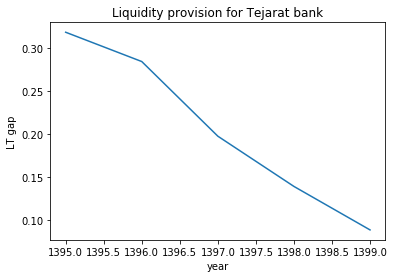

In [558]:
X=bb.index
Y=LQ['LT gap']
plt.plot(X,Y)
plt.xlabel('year')
plt.ylabel('LT gap')
plt.title('Liquidity provision for Tejarat bank')
plt.show()

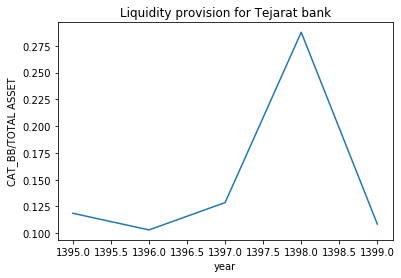

In [559]:

X=bb.index
Y=bb['CAT_BB/TOTAL ASSET']
plt.plot(X,Y)
plt.xlabel('year')
plt.ylabel('CAT_BB/TOTAL ASSET')
plt.title('Liquidity provision for Tejarat bank')
plt.show()

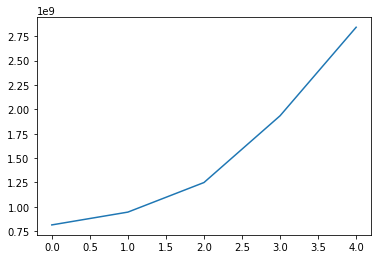

In [571]:
liii['sum_liq_a'].plot()

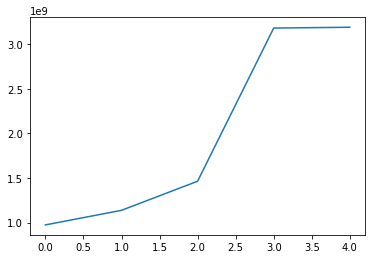

In [572]:
liii['sum_liq_d'].plot()